In [ ]:
# when the target variable we are trying to predict is continuous
# (e.g. in mathematical sense [1,5] is a continuous set where as {1,5} is discrete) then it is a regression problem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [3]:
diabetes_X.shape

(442, 10)

In [4]:
diabetes_y.shape

(442,)

In [5]:
X = diabetes_X # N x M
y = diabetes_y.reshape(-1,1)# N x 1

In [6]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [7]:
# Linear Regression can be implemented in two ways 1. Ordinary least squares (OLS) 2. Gradient Descent

In [8]:
# Assumptions for OLS
# 1. Observations are independent 
# 2. Linear relationship between the target and the observations
# 3. No collinearity amoung the variables 
# 4. Residuals follow normal distibution
# 5. No coorelation between variables and residuals
# This method involves finding coefficients using linear algebra operations and is well suited for smaller datasets

In [9]:
# 2. Using Gradient descent algorithm - This is an iterative optimisation algotithm. 
# used to find minimum of a function by updating it's coefficients in the direction of steepest descent of the gradient 
# aiming to minimise the cost or error associated with the model's prediction.

In [12]:
X_train.shape, y_train.shape

((422, 10), (422, 1))

In [13]:
def initialize_weights(X):
    bias = np.random.normal()
    weights = np.random.normal(size=(X.shape[1], 1)) # m x 1
    return bias, weights  

In [14]:
def prediction(X, bias, weights):
    return bias + X@weights    

In [15]:
def compute_cost(y_hat, y):
    m = len(y_hat)
    cost = np.sum(np.square(y_hat-y))/(2*m)
    return cost

In [20]:
def update_weights(X, y_hat, y):
    m = len(y_hat)
    d_bias =  np.sum(y_hat - y) / m
    d_weights = np.dot(X.T, (y_hat - y)) / m 
    return d_bias, d_weights   

In [29]:
lr = 0.01
iterations = 1000
bias, weights = initialize_weights(X_train)
cost_history = []
for i in range(iterations):
    y_hat = prediction(X_train, bias, weights)
    # print(y_hat)
    previous_cost = compute_cost(y_hat, y_train)
    # print(previous_cost)
    cost_history.append(previous_cost)
    # print(cost_history)
    bias_gradient, weights_gredient = update_weights(X_train, y_hat, y_train)
    # print(bias_gradient, weights_gredient)
    bias = bias - np.dot(lr, bias_gradient)
    weights = weights - np.dot(lr, weights_gredient)
    

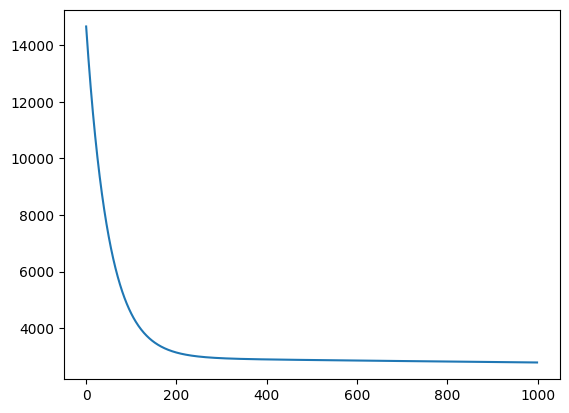

In [30]:
plt.plot(cost_history)

In [31]:
print(bias, weights)

153.34148456681905 [[  6.04891327]
 [  1.96231361]
 [ 21.65605311]
 [ 16.80790714]
 [  6.87442756]
 [  6.30493979]
 [-13.06236894]
 [ 16.20353122]
 [ 19.25153288]
 [ 12.74586322]]
